# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

In [1]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 59 (delta 18), reused 35 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 4.99 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (18/18), done.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1. $m(a + bX) =  \dfrac{1}{N} \sum_{i=1}^N (a+bx_i) = \dfrac{1}{N} \sum_{i=1}^N a + \dfrac{1}{N} \sum_{i=1}^N bx_i = (1/N)(N) a + b \times \dfrac{1}{N} \sum_{i=1}^N (x_i) = a+b \times m(X).$
2. $\text{cov}(X, a + bY) = \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(a + b y_i - m(a + bY)) = \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(a + b y_i - a - b m(Y)) = \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(b(y_i - m(Y))) = b \times \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(y_i - m(Y)) = b \times \text{cov}(X, Y)$
3. $\text{cov}(a + bX, a + bX) = \frac{1}{N} \sum_{i=1}^{N} (a + b x_i - m(a + bX))(a + b x_i - m(a + bX)) = \frac{1}{N} \sum_{i=1}^{N} (a + b x_i - a - b m(X))(a + b x_i - a - b m(X)) = b^2 \frac{1}{N} \sum_{i=1}^{N} (x_i - m(X))(x_i - m(X)) = b^2 \times \text{cov}(X, X) = b^2 \times s^2$,

  so for $\text{cov}(X, X)$, where a = 0 and b = 1, we just have $s^2$.
4. Since \( g(X) \) is non-decreasing, it preserves the order of all of the variables in comparison to one another, so the transformed median, quantiles, IQR, and range are all just going to be the transformation of the corresponding values from the original variable.
5. Again, since $g$ is non-decreasing, it preserves the order of the values in $X$, meaning the relative positions of data points and their distances from the mean remain unchanged, so applying $g$ to the mean $m(X)$ results in $m(g(X)) = g(m(X))$.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

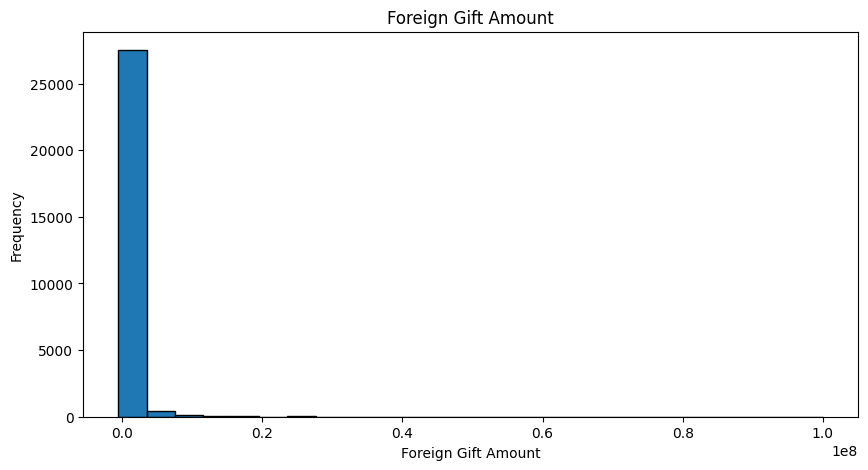

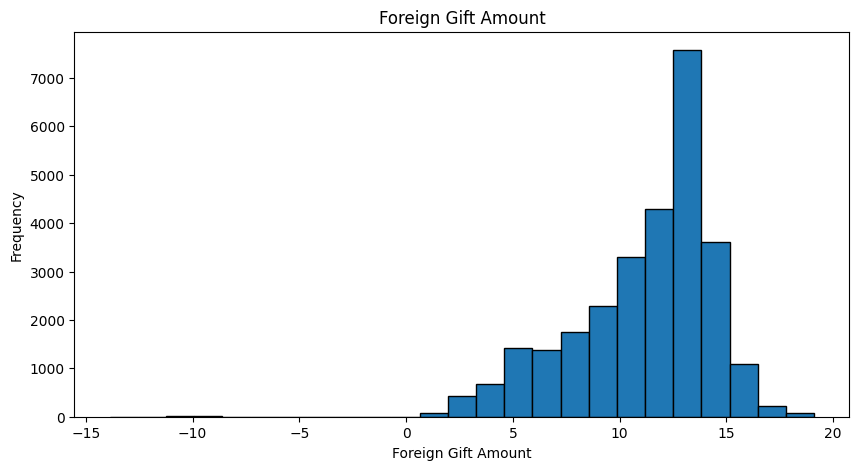

The variable describes gift amounts and is heavly skewed left, but doing inverse arcsin of 13, and getting 221206.69,
 that seems to be around where most of the data is.

       Gift Type  Count
0       Contract  17274
1  Monetary Gift  10936
2    Real Estate     11

61% of the gifts are contracts, 39% is monetary gifts, and only 11 instances are real estate.



/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


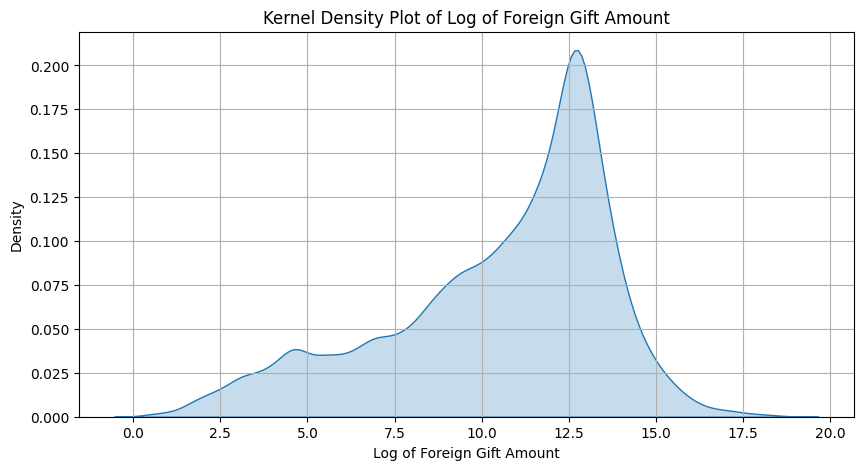

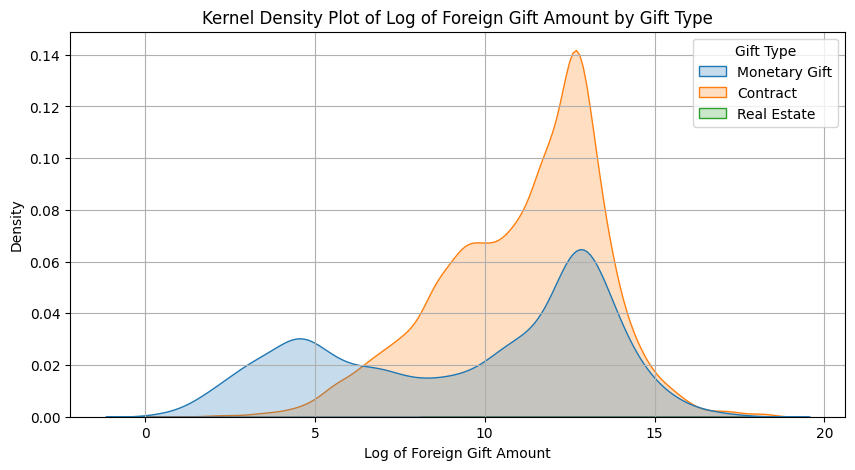

Monetary gift is bimodal, while contract is unimodal, making up most of the spike in that specific area of the KDE plot.



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv')

#2
plt.figure(figsize=(10, 5))
plt.hist(df['Foreign Gift Amount'].dropna(), bins=25, edgecolor='black')  # Drop NaN values if any
plt.title('Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

#gotta use arcsinh, as we're not really getting a good visualization otherwise.
df['Foreign Gift Amount (arcsinh)'] = np.arcsinh(df['Foreign Gift Amount'].dropna())
plt.figure(figsize=(10, 5))
plt.hist(df['Foreign Gift Amount (arcsinh)'].dropna(), bins=25, edgecolor='black')  # Drop NaN values if any
plt.title('Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()
print('The variable describes gift amounts and is heavly skewed left, but doing inverse arcsin of 13, and getting 221206.69,\n that seems to be around where most of the data is.\n')

#3
gift_type_counts = df['Gift Type'].value_counts()
gift_type_counts_df = gift_type_counts.reset_index()
gift_type_counts_df.columns = ['Gift Type', 'Count']
print(gift_type_counts_df)

print('\n61% of the gifts are contracts, 39% is monetary gifts, and only 11 instances are real estate.\n')

#4
df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount'])

# KDE plot for the log of Foreign Gift Amount
plt.figure(figsize=(10,5))
sns.kdeplot(df['Log Foreign Gift Amount'].dropna(), fill=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# KDE plot for the log of Foreign Gift Amount conditioned on Gift Type
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', fill=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()
print('Monetary gift is bimodal, while contract is unimodal, making up most of the spike in that specific area of the KDE plot.\n')


Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64

Top 15 countries by amount given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA       

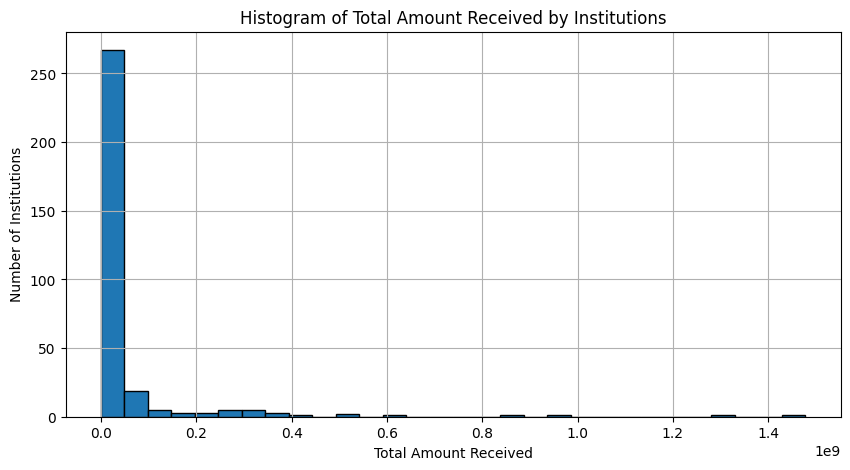

Giftors who provide the most money in total:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


In [36]:
#5
top_15_countries_by_gifts = df['Country of Giftor'].value_counts().head(15)

top_15_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

print("Top 15 countries by number of gifts:")
print(top_15_countries_by_gifts)

print("\nTop 15 countries by amount given:")
print(top_15_countries_by_amount)

#6
top_15_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

# top 15
print("\nTop 15 institutions by total amount received:")
print(top_15_institutions)

# histogram
plt.figure(figsize=(10,5))
plt.hist(df.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=30, edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.grid(True)
plt.show()

#7
top_giftors_by_amount = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)

print("Giftors who provide the most money in total:")
print(top_giftors_by_amount.head(5))


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

623 observations, 10 variables. 'Not available' is in place of numbers, so will need to account for that.


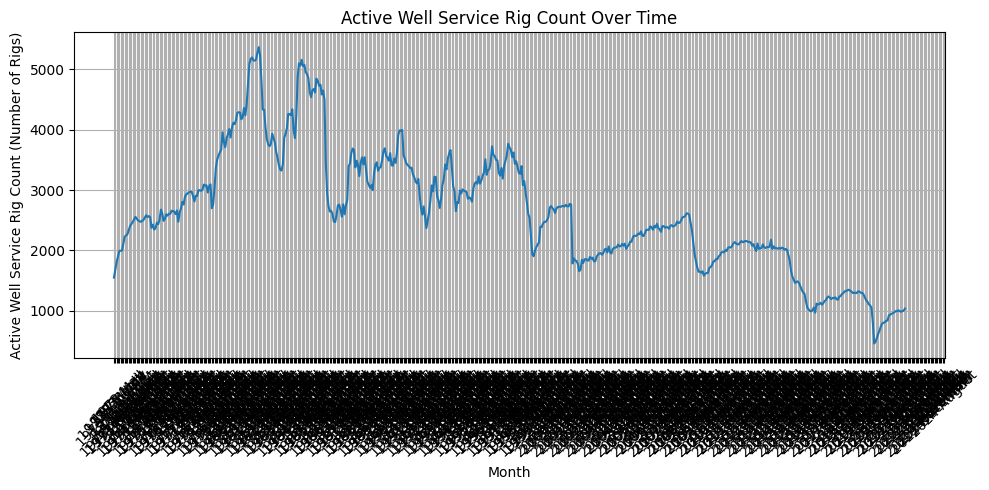

This looks so freaking bad on the x-axis but you can tell what's going on tbh. Anyway the trend in Service rigs is generally decreasing.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#1
df = pd.read_csv('/content/EDA/assignment/data/drilling_rigs.csv')
      #print(df.head())
print('623 observations, 10 variables. \'Not available\' is in place of numbers, so will need to account for that.')

#2
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
df['time'] = pd.to_datetime(df['Month'], format='mixed')
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Month'], y=df['Active Well Service Rig Count (Number of Rigs)'])

#3
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Month')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print('This looks so freaking bad on the x-axis but you can tell what\'s going on tbh. Anyway the trend in Service rigs is generally decreasing.')

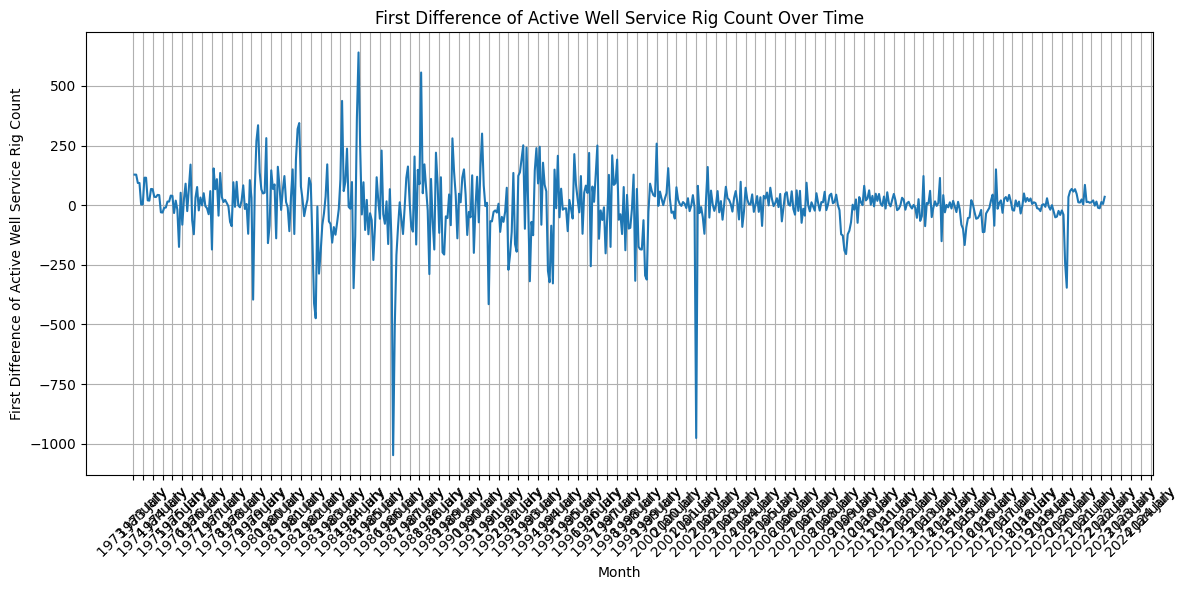

Looks like at a few points in time, namely 1985 or so and 2002 or so, there was a dramatic decrease--legislation? 
And the biggest increase was 1982-1983 or so.


In [17]:
#4
df['First Difference'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Month'], y=df['First Difference'])

plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Month')
plt.ylabel('First Difference of Active Well Service Rig Count')

plt.xticks(df['Month'][::6], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print('Looks like at a few points in time, namely 1985 or so and 2002 or so, there was a dramatic decrease--legislation? \nAnd the biggest increase was 1982-1983 or so.')

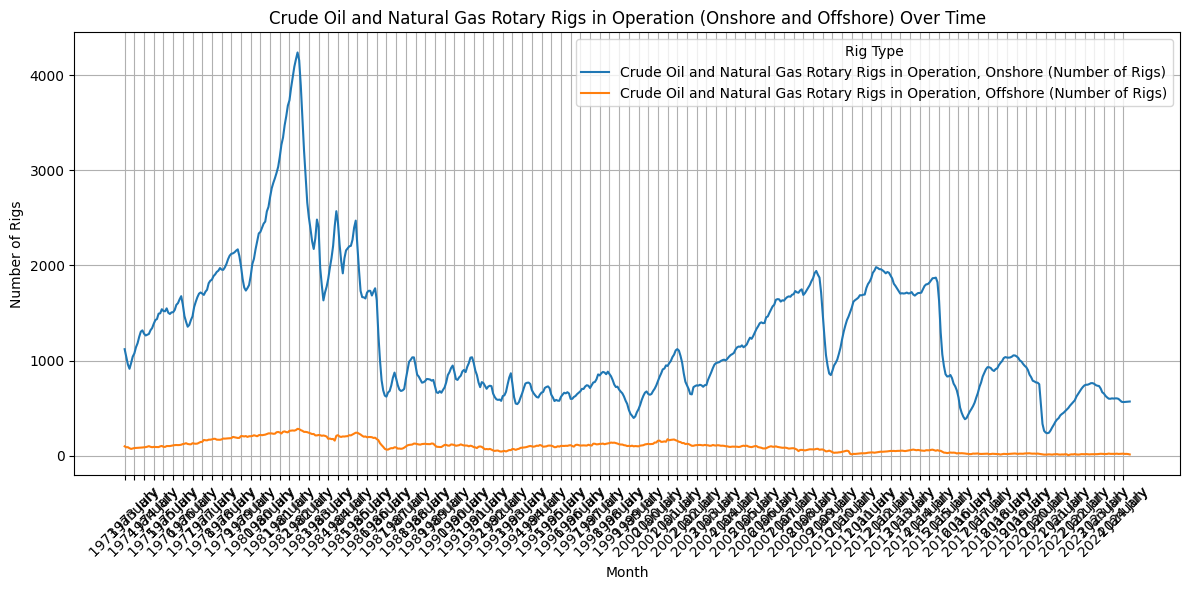

Cool.


In [19]:
#5
df_melted = df.melt(id_vars=['Month'],
                    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Rig Type',
                    value_name='Number of Rigs')
plt.figure(figsize=(12,6))
sns.lineplot(x=df_melted['Month'], y=df_melted['Number of Rigs'], hue=df_melted['Rig Type'])
plt.title('Crude Oil and Natural Gas Rotary Rigs in Operation (Onshore and Offshore) Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Rigs')
plt.xticks(df['Month'][::6], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
print('Cool.')